# Naiv Bayes

In [46]:
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
import collections
import numpy as np
import random

class NaivBayes:
    
    # Params
    μ = []
    σ = []

    K = 0
    prior_y = []
        
    # Generate data with K number of classes (only 3 works)
    def sample(self, K, class_N):
        s_1 = random.randint(round(class_N * 0.9), round(class_N * 1.1))
        s_2 = random.randint(round(class_N * 0.9), round(class_N * 1.1))
        s_3 = random.randint(round(class_N * 0.9), round(class_N * 1.1))
        
        x_1 = np.random.multivariate_normal([2,2], [[1,0],[0,1]], s_1)
        x_2 = np.random.multivariate_normal([4,5], [[1,0],[0,1]], s_2)
        x_3 = np.random.multivariate_normal([6,3], [[1,0],[0,1]], s_3)
        
        # X and y
        X = np.concatenate([x_1, x_2, x_3])
        y = np.concatenate([np.zeros(s_1), np.ones(s_2), 2 * np.ones(s_3)])
        
        return X, y

    # MAP (Maximum A Posteriori) - Learn the parameters of the data
    def fit(self, X, y):
        
        # Set self params
        self.K = np.unique(y).size
        self.prior_y = collections.Counter(y)

        # Train the model
        for k in range(self.K):
            self.μ.append(np.mean(X[y == k], axis=0))
            self.σ.append(np.var(X[y == k]))
    
    # MAP (Maximum A Posteriori) - Predict the class of the given data points
    def predict(self, X):
        posterior = np.zeros([len(X), 3])
        for k in range(self.K):
            posterior[:,k] = multivariate_normal(self.μ[k], self.σ[2]).pdf(X) * self.prior_y[k]
        posterior = np.argmax(posterior,axis=1)
        return posterior
    
    # MAP (Maximum A Posteriori) - Fit predict
    def fit_predict(self, X, y):
        self.fit(X,y)
        return self.predict(X)

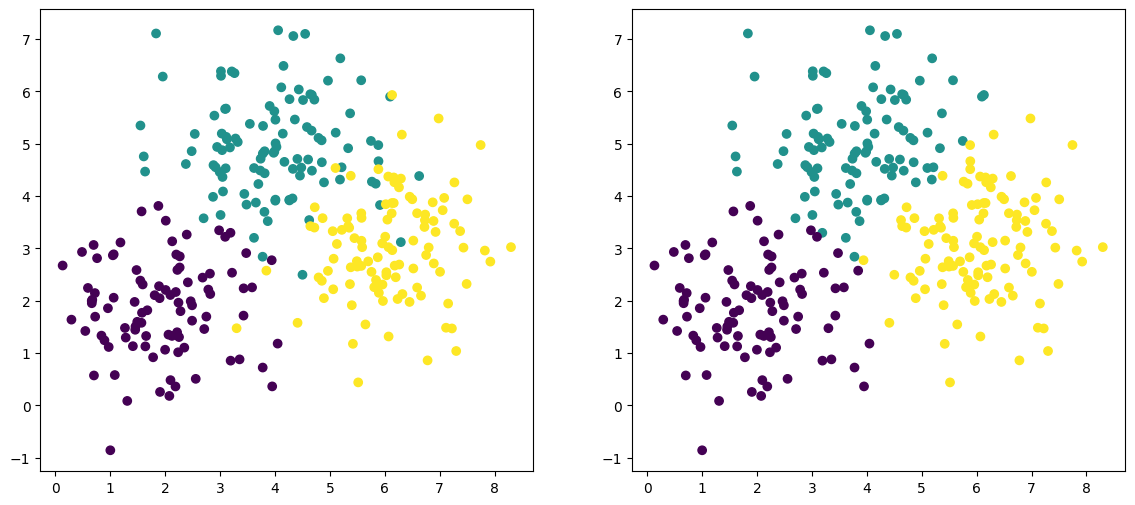

In [48]:
nb = NaivBayes()
# nb.train()
X, y = nb.sample(3, 100)
l1, l2 = np.linspace(-1,10,50), np.linspace(-1,10,50)
g1,g2 = np.meshgrid(l1,l2)
data = np.vstack([g1.flatten(), g2.flatten()])

fig, ax = plt.subplots(1,2, figsize=(14,6))
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[1].scatter(X[:,0], X[:,1], c=nb.fit_predict(X,y))

## Data generation

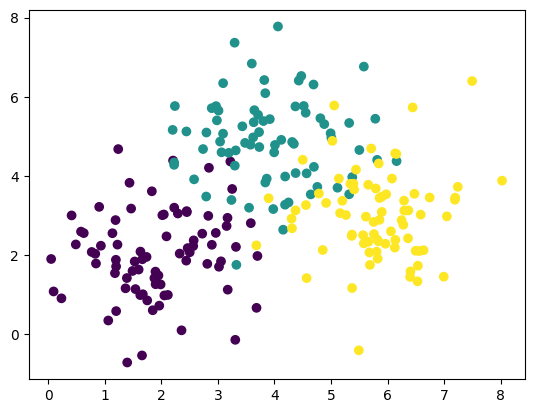

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

s_1 = rnd.randint(65,85)
s_2 = rnd.randint(70,80)
s_3 = rnd.randint(65,80)

# Generate data
x_1 = np.random.multivariate_normal([2,2], [[1,0],[0,1]], s_1)
x_2 = np.random.multivariate_normal([4,5], [[1,0],[0,1]], s_2)
x_3 = np.random.multivariate_normal([6,3], [[1,0],[0,1]], s_3)

# X and y
X = np.concatenate([x_1, x_2, x_3])
y = np.concatenate([np.zeros(s_1), np.ones(s_2), 2 * np.ones(s_3)])

# Plot
plt.scatter(X[:,0], X[:,1], c=y)

## Maximum a posteriori (MAP)

In [41]:
import collections
from scipy.stats import multivariate_normal

class NaivBayes:
    
    # Params
    μ = []
    σ = []
    
    K = 0
    prior_y = []

    # Learn the parameters of the data
    def fit(self, X, y):
        
        # Set self params
        self.K = np.unique(y).size
        self.prior_y = collections.Counter(y)

        # Train the model
        for k in range(self.K):
            self.μ.append(np.mean(X[y == k], axis=0))
            self.σ.append(np.var(X[y == k]))
            
    def predict(self, X):
        posterior = np.zeros([len(X), 3])
        for k in range(self.K):
            posterior[:,k] = multivariate_normal(self.μ[k], self.σ[2]).pdf(X) * self.prior_y[k]
        posterior = np.argmax(posterior,axis=1)
        return posterior

(232,)


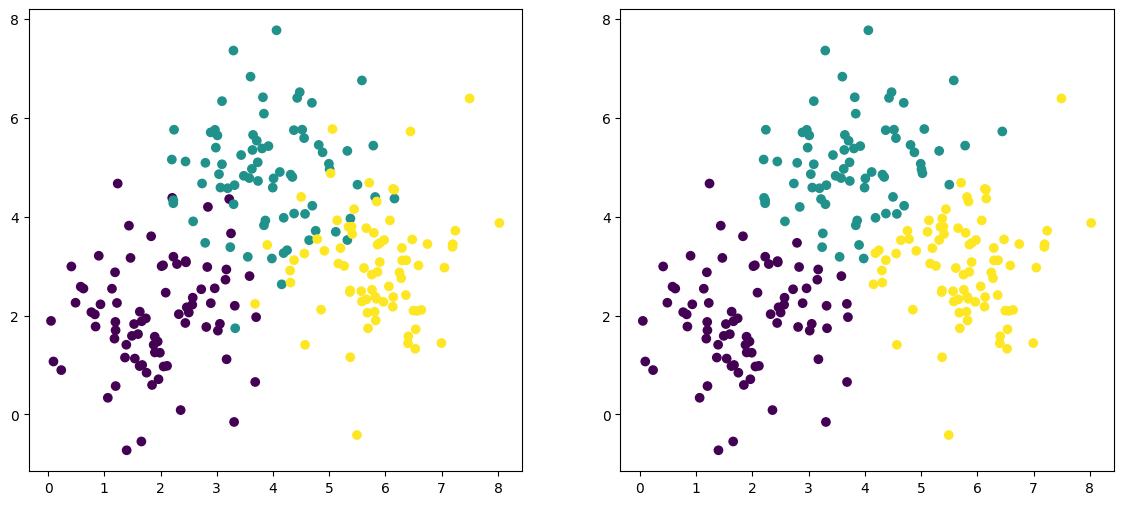

In [43]:
nb = NaivBayes()
nb.fit(X,y)
pred = nb.predict(X)
print(y.shape)

fig, ax = plt.subplots(1,2,figsize=(14,6))
ax[0].scatter(X[:,0], X[:,1], c=y)
ax[1].scatter(X[:,0], X[:,1], c=pred)

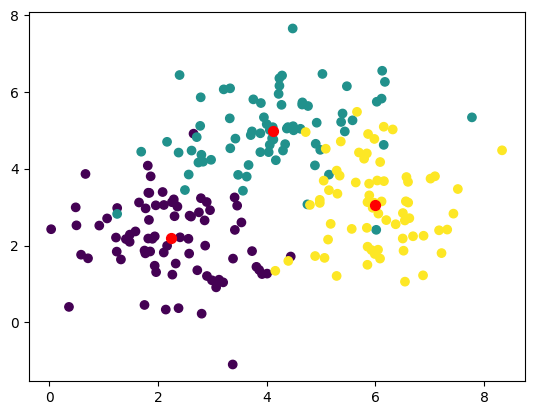

In [3]:
# Train the NaivBayes classification model
nb = NaivBayes()
nb.fit(X, y)

# Plot
plt.scatter(X[:,0], X[:,1], c=y)
for k in range(nb.K):
    plt.scatter(nb.μ[k][0], nb.μ[k][1], c='red', s=50)